# Projet 10

Problématique : Créer un chatbot

+++++ expliquer Luis

Nous disposons des dialogues Frames au format JSON.

Les données proviennent de ce site : https://www.microsoft.com/en-us/research/project/frames-dataset/download/

In [461]:
import pandas as pd

In [462]:
import sys
# Insert the path of modules folder
sys.path.insert(0, "Package")

# Import the module0 directly since
import Scripts_Analyse01 as pk
import Scripts_AnalyseMulti01 as pk_multi
import Scripts_AnalyseMulti02_Unsupervised as pk_multi_unsp
import Scripts_AnalyseMulti02_Supervised as pk_multi_sup

In [463]:
df = pd.read_json("data\\frames\\frames.json")

Regardons à quoi ressemble nos données

In [10]:
df

,user_id,turns,wizard_id,id,labels
0,U22HTHYNP,[{'text': 'I'd like to book a trip to Atlantis...,U21DKG18C,e2c0fc6c-2134-4891-8353-ef16d8412c9a,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc..."
1,U21E41CQP,"[{'text': 'Hello, I am looking to book a vacat...",U21DMV0KA,4a3bfa39-2c22-42c8-8694-32b4e34415e9,"{'userSurveyRating': 3.0, 'wizardSurveyTaskSuc..."
2,U21RP4FCY,[{'text': 'Hello there i am looking to go on a...,U21E0179B,6e67ed28-e94c-4fab-96b6-68569a92682f,"{'userSurveyRating': 2.0, 'wizardSurveyTaskSuc..."
3,U22HTHYNP,[{'text': 'Hi I'd like to go to Caprica from B...,U21DKG18C,5ae76e50-5b48-4166-9f6d-67aaabd7bcaa,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."
4,U21E41CQP,"[{'text': 'Hello, I am looking to book a trip ...",U21DMV0KA,24603086-bb53-431e-a0d8-1dcc63518ba9,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."
...,...,...,...,...,...
1364,U2AMZ8TLK,[{'text': 'Hi I've got 9 days free and I'm loo...,U21DMV0KA,957fd205-bb7c-4b81-8cb6-13c81c51c5c9,"{'userSurveyRating': 3.5, 'wizardSurveyTaskSuc..."
1365,U2AMZ8TLK,[{'text': 'I need to get to Fortaleza on Septe...,U260BGVS6,71b21b86-2d05-4372-a0ee-6ed64b0ddc42,"{'userSurveyRating': 4.5, 'wizardSurveyTaskSuc..."
1366,U231PNNA3,[{'text': 'We're finally going on vacation isn...,U21T9NMKM,ef2cd70e-c1f2-42be-8839-cb465af0bf41,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."
1367,U2AMZ8TLK,"[{'text': 'Hi there, I'm looking for a place t...",U21DMV0KA,ffa79d2c-14eb-45e6-8573-b0817a1a1803,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc..."


Nous avons 1 369 lignes et 5 variables. La variable "turns" contient les échanges avec le bot. <br>
Regardons plus en détail ce que contient ce champ sur un exemple

In [464]:
import gc

gc.collect()

0

In [53]:
df["turns"][0][0]

{'text': "I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.",
 'labels': {'acts': [{'args': [{'val': 'book', 'key': 'intent'}],
    'name': 'inform'},
   {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
     {'val': 'Caprica', 'key': 'or_city'},
     {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
     {'val': '8', 'key': 'n_adults'},
     {'val': '1700', 'key': 'budget'}],
    'name': 'inform'}],
  'acts_without_refs': [{'args': [{'val': 'book', 'key': 'intent'}],
    'name': 'inform'},
   {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
     {'val': 'Caprica', 'key': 'or_city'},
     {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
     {'val': '8', 'key': 'n_adults'},
     {'val': '1700', 'key': 'budget'}],
    'name': 'inform'}],
  'active_frame': 1,
  'frames': [{'info': {'intent': [{'val': 'book', 'negated': False}],
     'budget': [{'val': '1700.0', 'negated': False}],
     'dst_city': [{

In [34]:
df["turns"][0][0]["text"]

"I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700."

In [60]:
df["turns"][0][0]["labels"]["acts"][1]

[{'text': "I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.",
  'labels': {'acts': [{'args': [{'val': 'book', 'key': 'intent'}],
     'name': 'inform'},
    {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
      {'val': 'Caprica', 'key': 'or_city'},
      {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
      {'val': '8', 'key': 'n_adults'},
      {'val': '1700', 'key': 'budget'}],
     'name': 'inform'}],
   'acts_without_refs': [{'args': [{'val': 'book', 'key': 'intent'}],
     'name': 'inform'},
    {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
      {'val': 'Caprica', 'key': 'or_city'},
      {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
      {'val': '8', 'key': 'n_adults'},
      {'val': '1700', 'key': 'budget'}],
     'name': 'inform'}],
   'active_frame': 1,
   'frames': [{'info': {'intent': [{'val': 'book', 'negated': False}],
      'budget': [{'val': '1700.0', 'negated': False}],

Le but est de reprendre la première intéraction et les parties "act" avec les intentions pour pouvoir envoyer ces informations à Luis.

## Construction de la base de données

Récupérons la première demande du client et les informations obtenues. Il se peut qu'on n'est aucune information lors de la première demande

In [59]:
df.head(2)

,user_id,turns,wizard_id,id,labels
0,U22HTHYNP,[{'text': 'I'd like to book a trip to Atlantis...,U21DKG18C,e2c0fc6c-2134-4891-8353-ef16d8412c9a,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc..."
1,U21E41CQP,"[{'text': 'Hello, I am looking to book a vacat...",U21DMV0KA,4a3bfa39-2c22-42c8-8694-32b4e34415e9,"{'userSurveyRating': 3.0, 'wizardSurveyTaskSuc..."


In [465]:
df["text"] = df["turns"].apply(lambda x: x[0]["text"])

In [186]:
df.head(2)

,user_id,turns,wizard_id,id,labels,text
0,U22HTHYNP,[{'text': 'I'd like to book a trip to Atlantis...,U21DKG18C,e2c0fc6c-2134-4891-8353-ef16d8412c9a,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc...",I'd like to book a trip to Atlantis from Capri...
1,U21E41CQP,"[{'text': 'Hello, I am looking to book a vacat...",U21DMV0KA,4a3bfa39-2c22-42c8-8694-32b4e34415e9,"{'userSurveyRating': 3.0, 'wizardSurveyTaskSuc...","Hello, I am looking to book a vacation from Go..."


In [466]:
df["acts"] = df["turns"].apply(lambda x: x[0]["labels"]["acts"][1] if len(x[0]["labels"]["acts"])>=2 else None)

In [190]:
df.tail(2)

,user_id,turns,wizard_id,id,labels,text,acts
1367,U2AMZ8TLK,"[{'text': 'Hi there, I'm looking for a place t...",U21DMV0KA,ffa79d2c-14eb-45e6-8573-b0817a1a1803,None,"Hi there, I'm looking for a place to get away ...","[{'args': [{'val': 'book', 'key': 'intent'}, {..."
1368,U2AMZ8TLK,[{'text': 'I need to book a trip for the whole...,U260BGVS6,0d364be2-9f43-4f5a-8506-1af4523515ba,"{'args': [{'val': 'Tampa', 'key': 'or_city'}, ...",I need to book a trip for the whole family fro...,"[{'args': [{'val': 'book', 'key': 'intent'}], ..."


In [231]:
def process_keyval(x, lib):
    if (x != None) and (len(x["args"]) >= 1):
        for v in x["args"]:
            if lib in v["key"]:
                return v["val"]
    else:
        return None

Nous avons besoin d'obtenir ces informations : <br>
- or_city (Ville de départ)
- dst_city (Ville de destination)
- str_date (Date aller souhaitée du vol)
- end_date (Date retour souhaitée du vol)
- budget (Budget maximum pour le prix total des billets)

In [468]:
df["dst_city"] = df["acts"].apply(lambda x: process_keyval(x, "dst_city"))

In [469]:
df["or_city"] = df["acts"].apply(lambda x: process_keyval(x, "or_city"))

In [470]:
df["str_date"] = df["acts"].apply(lambda x: process_keyval(x, "str_date"))

In [471]:
df["end_date"] = df["acts"].apply(lambda x: process_keyval(x, "end_date"))

In [472]:
df["budget"] = df["acts"].apply(lambda x: process_keyval(x, "budget"))

In [473]:
df.describe()

,user_id,turns,wizard_id,id,labels,text,acts,budget,dst_city,or_city,str_date,end_date
count,1369,1369,1369,1369,1369,1369,1077,170,656,585,272,151
unique,11,1369,12,1369,16,1329,812,94,220,221,157,118
top,U22K1SX9N,[{'text': 'I'd like to book a trip to Atlantis...,U21T9NMKM,e2c0fc6c-2134-4891-8353-ef16d8412c9a,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...",hi,"{'args': [{'val': 'book', 'key': 'intent'}], '...",-1,-1,Kabul,August 27th,24th
freq,345,1,301,1,929,10,214,15,18,14,10,3


Analysons d'abord nos données.

## Exploration des données

In [475]:
df["userSurveyRating"] = df["labels"].apply(lambda x: x["userSurveyRating"])

In [483]:
df.describe()

,userSurveyRating
count,1366.000000
mean,4.573419
std,0.839596
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


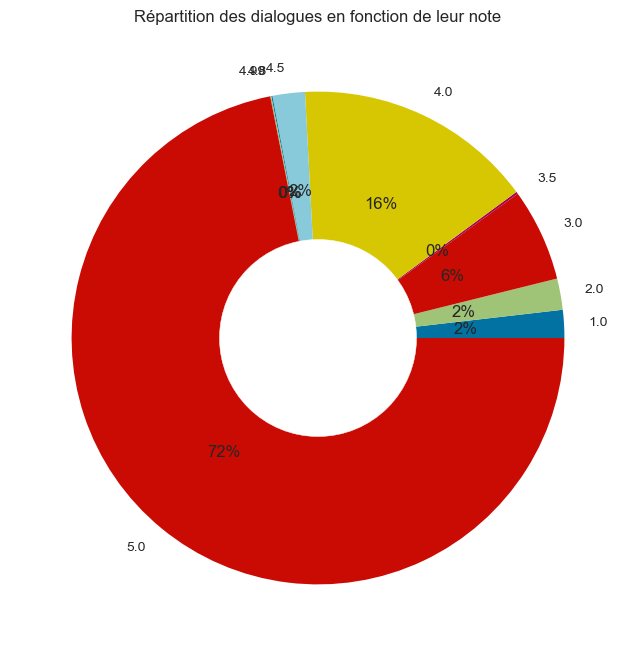

In [477]:
pk.graph_circle(df["userSurveyRating"], "userSurveyRating",
                 "Répartition des dialogues en fonction de leur note")

In [480]:
df["user_id"].nunique()

11

11 utilisateurs.

In [485]:
df[df.select_dtypes(include=['object', 'string']).columns].describe()

,user_id,turns,wizard_id,id,labels,text,acts,budget,dst_city,or_city,str_date,end_date
count,1369,1369,1369,1369,1369,1369,1077,170,656,585,272,151
unique,11,1369,12,1369,16,1329,812,94,220,221,157,118
top,U22K1SX9N,[{'text': 'I'd like to book a trip to Atlantis...,U21T9NMKM,e2c0fc6c-2134-4891-8353-ef16d8412c9a,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...",hi,"{'args': [{'val': 'book', 'key': 'intent'}], '...",-1,-1,Kabul,August 27th,24th
freq,345,1,301,1,929,10,214,15,18,14,10,3


## Envoies des données à Luis

In [250]:
from azure.cognitiveservices.language.luis.authoring import LUISAuthoringClient
from azure.cognitiveservices.language.luis.authoring.models import ApplicationCreateObject
from azure.cognitiveservices.language.luis.runtime import LUISRuntimeClient
from msrest.authentication import CognitiveServicesCredentials
from functools import reduce

import json, time, uuid

In [251]:
authoringKey = 'c06a2fb95f4e4055b23bbbbcb2730622'
authoringEndpoint = 'https://luisappproject10weu001-authoring.cognitiveservices.azure.com/'
predictionKey = '8eb6e2eaf7684047ae5a8105969b1f95'
predictionEndpoint = 'https://luis-appproject10-weu-001.cognitiveservices.azure.com/'

In [252]:
client = LUISAuthoringClient(authoringEndpoint, CognitiveServicesCredentials(authoringKey))

In [265]:
app_id = "a45b7b18-7ad5-4671-85d8-33ea9f04cba6"
app_name = "app-project10fly-weu-001"
version_id = 0.1

In [263]:
client.model.add_intent(app_id, version_id, "book")

'21b6bb35-3958-402d-9252-77dbccabb00e'

In [267]:
modelId = '21b6bb35-3958-402d-9252-77dbccabb00e'

Ajoutons les entités nécessaire : dst_city,	or_city, str_date, end_date, budget

Commençons par les entités préconstruites : number et date

In [275]:
client.model.add_prebuilt(app_id, version_id, prebuilt_extractor_names=["number"])
client.model.add_prebuilt(app_id, version_id, prebuilt_extractor_names=["datetimeV2"])

In [281]:
client.model.add_prebuilt(app_id, version_id, prebuilt_extractor_names=["geographyV2"])

In [278]:
# define machine-learned entity
mlEntityDefinition = [
{
    "name": "dst_city",
    "children": [
        { "name": "city" }
    ]
},
{
    "name": "or_city",
    "children": [
        { "name": "city" }
    ]
},
{
    "name": "str_date",
    "children": [
        { "name": "date" }
    ]
},
{
    "name": "end_date",
    "children": [
        { "name": "date" }
    ]
},
{
    "name": "budget",
    "children": [
        { "name": "value" }
    ]
}]


In [285]:
for i in mlEntityDefinition:
    print(i)

{'name': 'dst_city', 'children': [{'name': 'city'}]}
{'name': 'or_city', 'children': [{'name': 'city'}]}
{'name': 'str_date', 'children': [{'name': 'date'}]}
{'name': 'end_date', 'children': [{'name': 'date'}]}
{'name': 'budget', 'children': [{'name': 'value'}]}


In [279]:
# add entity to app
modelId = client.model.add_entity(app_id, version_id, name="Book Flight", children=mlEntityDefinition)

Mettre en forme le format des entités

In [266]:
def get_grandchild_id(model, childName, grandChildName):
    theseChildren = next(filter((lambda child: child.name == childName), model.children))
    theseGrandchildren = next(filter((lambda child: child.name == grandChildName), theseChildren.children))
    grandChildId = theseGrandchildren.id
    return grandChildId

Définissons du format des entités enfants

In [290]:
# Get entity and subentities
modelObject = client.model.get_entity(app_id, version_id, modelId)

In [294]:
entityIdAll = []

for i in mlEntityDefinition:
    id = get_grandchild_id(modelObject, i["name"], i["children"][0]["name"])
    entityIdAll.append({"name":i["children"][0]["name"], "id": id})

In [295]:
entityIdAll

[{'name': 'city', 'id': 'ec1e5957-d78e-4ff4-8807-f944b69bb73c'},
 {'name': 'city', 'id': '4dcfd44c-8fb7-439d-bb94-c3ab67c5416e'},
 {'name': 'date', 'id': 'b9098f74-7657-4cd3-b0fe-b74783168562'},
 {'name': 'date', 'id': 'e2337cec-4aab-4181-8079-4ba5db775e5d'},
 {'name': 'value', 'id': 'da5e9245-d060-4810-805e-af8cacd3e33b'}]

In [293]:
number = { "model_name": "number" }
datetimeV2 = { "model_name": "datetimeV2" }
geographyV2 = { "model_name": "geographyV2" }

In [296]:
for item in entityIdAll:
    if item["name"]=='city':
        client.features.add_entity_feature(app_id, version_id, item["id"], geographyV2)
    elif item["name"]=='date':
        client.features.add_entity_feature(app_id, version_id, item["id"], datetimeV2)
    elif item["name"]=='value':
        client.features.add_entity_feature(app_id, version_id, item["id"], number)

In [301]:
intentName = "book"

In [308]:
tx = "banie"

In [310]:
tx.index("an")

1

In [311]:
tx.rindex("an")

1

In [339]:
import re
print ([m.start(0) for m in re.finditer(re.escape('1700'), df_test["text"][0])])

[117]


In [338]:
df_test

,user_id,turns,wizard_id,id,labels,text,acts,dst_city,or_city,str_date,end_date,budget
0,U22HTHYNP,[{'text': 'I'd like to book a trip to Atlantis...,U21DKG18C,e2c0fc6c-2134-4891-8353-ef16d8412c9a,"{'args': [{'val': 'Atlantis', 'key': 'dst_city...",I'd like to book a trip to Atlantis from Capri...,"[{'args': [{'val': 'book', 'key': 'intent'}], ...",Atlantis,Caprica,"Saturday, August 13, 2016",None,1700
1,U21E41CQP,"[{'text': 'Hello, I am looking to book a vacat...",U21DMV0KA,4a3bfa39-2c22-42c8-8694-32b4e34415e9,"{'args': [{'val': 'Mos Eisley', 'key': 'dst_ci...","Hello, I am looking to book a vacation from Go...","[{'args': [{'val': 'book', 'key': 'intent'}], ...",Mos Eisley,Gotham City,None,None,2100
2,U21RP4FCY,[{'text': 'Hello there i am looking to go on a...,U21E0179B,6e67ed28-e94c-4fab-96b6-68569a92682f,"{'args': [{'val': 'Gotham City', 'key': 'dst_c...",Hello there i am looking to go on a vacation w...,"[{'args': [{'val': 'book', 'key': 'intent'}], ...",Gotham City,None,None,None,None
3,U22HTHYNP,[{'text': 'Hi I'd like to go to Caprica from B...,U21DKG18C,5ae76e50-5b48-4166-9f6d-67aaabd7bcaa,"{'args': [{'val': 'Caprica', 'key': 'dst_city'...","Hi I'd like to go to Caprica from Busan, betwe...","[{'args': [{'val': 'book', 'key': 'intent'}], ...",Caprica,Busan,"Sunday August 21, 2016","Wednesday August 31, 2016",None
4,U21E41CQP,"[{'text': 'Hello, I am looking to book a trip ...",U21DMV0KA,24603086-bb53-431e-a0d8-1dcc63518ba9,"{'args': [{'val': '6', 'key': 'n_children'}, {...","Hello, I am looking to book a trip for 2 adult...","[{'args': [{'val': 'book', 'key': 'intent'}], ...",Denver,Kochi,None,None,"$21,300"
5,U21RP4FCY,"[{'text': 'Hey, i Want to go to St. Louis on t...",U21E0179B,bbd17a54-bc6c-4237-8f72-4778081fab0c,"{'args': [{'val': 'St. Louis', 'key': 'dst_cit...","Hey, i Want to go to St. Louis on the 17th of ...","[{'args': [{'val': 'book', 'key': 'intent'}], ...",St. Louis,None,17th of August,None,None
6,U22HTHYNP,[{'text': 'I'm looking for a trip to Gotham Ci...,U21DKG18C,660f2f7a-b660-4f2c-aae9-e5cdb28d818c,"{'args': [{'val': 'Gotham City', 'key': 'dst_c...",I'm looking for a trip to Gotham City leaving ...,"[{'args': [{'val': 'book', 'key': 'intent'}], ...",Gotham City,Kakariko Village,"Saturday, August 13, 2016",None,$2400 USD
7,U21E41CQP,"[{'text': 'Hello, I would like to book a 2-wee...",U21DMV0KA,84823cb8-4e01-4dc1-8d10-1f2a5ef40b80,"{'args': [{'val': 'book', 'key': 'intent'}], '...","Hello, I would like to book a 2-week trip leav...","[{'args': [], 'name': 'greeting'}, {'args': [{...",None,None,None,None,None
8,U21RP4FCY,"[{'text': 'Hello, I am planning to book a trip...",U21E0179B,3f238ba1-c385-415a-a511-998330c03750,"{'args': [{'val': 'pittsborgh', 'key': 'dst_ci...","Hello, I am planning to book a trip to pittsborgh","[{'args': [{'val': 'book', 'key': 'intent'}], ...",pittsborgh,None,None,None,None
9,U22HTHYNP,"[{'text': 'Hi, I need to go to Mos Eisley for ...",U21DKG18C,45f2dfa5-d8ad-4f33-8994-68bc040e6901,"{'args': [{'val': 'Mos Eisley', 'key': 'dst_ci...","Hi, I need to go to Mos Eisley for a wedding, ...","[{'args': [{'val': 'book', 'key': 'intent'}], ...",Mos Eisley,None,"Saturday, August 13, 2016","Tuesday, August 16, 2016",$3700


Maintenant que nous avons créé notre schéma, nous pouvons importer les exemples de notre base.

In [327]:
df.head(10)

,user_id,turns,wizard_id,id,labels,text,acts,dst_city,or_city,str_date,end_date,budget
0,U22HTHYNP,[{'text': 'I'd like to book a trip to Atlantis...,U21DKG18C,e2c0fc6c-2134-4891-8353-ef16d8412c9a,"{'args': [{'val': 'Atlantis', 'key': 'dst_city...",I'd like to book a trip to Atlantis from Capri...,"[{'args': [{'val': 'book', 'key': 'intent'}], ...",Atlantis,Caprica,"Saturday, August 13, 2016",None,1700
1,U21E41CQP,"[{'text': 'Hello, I am looking to book a vacat...",U21DMV0KA,4a3bfa39-2c22-42c8-8694-32b4e34415e9,"{'args': [{'val': 'Mos Eisley', 'key': 'dst_ci...","Hello, I am looking to book a vacation from Go...","[{'args': [{'val': 'book', 'key': 'intent'}], ...",Mos Eisley,Gotham City,None,None,2100
2,U21RP4FCY,[{'text': 'Hello there i am looking to go on a...,U21E0179B,6e67ed28-e94c-4fab-96b6-68569a92682f,"{'args': [{'val': 'Gotham City', 'key': 'dst_c...",Hello there i am looking to go on a vacation w...,"[{'args': [{'val': 'book', 'key': 'intent'}], ...",Gotham City,None,None,None,None
3,U22HTHYNP,[{'text': 'Hi I'd like to go to Caprica from B...,U21DKG18C,5ae76e50-5b48-4166-9f6d-67aaabd7bcaa,"{'args': [{'val': 'Caprica', 'key': 'dst_city'...","Hi I'd like to go to Caprica from Busan, betwe...","[{'args': [{'val': 'book', 'key': 'intent'}], ...",Caprica,Busan,"Sunday August 21, 2016","Wednesday August 31, 2016",None
4,U21E41CQP,"[{'text': 'Hello, I am looking to book a trip ...",U21DMV0KA,24603086-bb53-431e-a0d8-1dcc63518ba9,"{'args': [{'val': '6', 'key': 'n_children'}, {...","Hello, I am looking to book a trip for 2 adult...","[{'args': [{'val': 'book', 'key': 'intent'}], ...",Denver,Kochi,None,None,"$21,300"
5,U21RP4FCY,"[{'text': 'Hey, i Want to go to St. Louis on t...",U21E0179B,bbd17a54-bc6c-4237-8f72-4778081fab0c,"{'args': [{'val': 'St. Louis', 'key': 'dst_cit...","Hey, i Want to go to St. Louis on the 17th of ...","[{'args': [{'val': 'book', 'key': 'intent'}], ...",St. Louis,None,17th of August,None,None
6,U22HTHYNP,[{'text': 'I'm looking for a trip to Gotham Ci...,U21DKG18C,660f2f7a-b660-4f2c-aae9-e5cdb28d818c,"{'args': [{'val': 'Gotham City', 'key': 'dst_c...",I'm looking for a trip to Gotham City leaving ...,"[{'args': [{'val': 'book', 'key': 'intent'}], ...",Gotham City,Kakariko Village,"Saturday, August 13, 2016",None,$2400 USD
7,U21E41CQP,"[{'text': 'Hello, I would like to book a 2-wee...",U21DMV0KA,84823cb8-4e01-4dc1-8d10-1f2a5ef40b80,"{'args': [{'val': 'book', 'key': 'intent'}], '...","Hello, I would like to book a 2-week trip leav...","[{'args': [], 'name': 'greeting'}, {'args': [{...",None,None,None,None,None
8,U21RP4FCY,"[{'text': 'Hello, I am planning to book a trip...",U21E0179B,3f238ba1-c385-415a-a511-998330c03750,"{'args': [{'val': 'pittsborgh', 'key': 'dst_ci...","Hello, I am planning to book a trip to pittsborgh","[{'args': [{'val': 'book', 'key': 'intent'}], ...",pittsborgh,None,None,None,None
9,U22HTHYNP,"[{'text': 'Hi, I need to go to Mos Eisley for ...",U21DKG18C,45f2dfa5-d8ad-4f33-8994-68bc040e6901,"{'args': [{'val': 'Mos Eisley', 'key': 'dst_ci...","Hi, I need to go to Mos Eisley for a wedding, ...","[{'args': [{'val': 'book', 'key': 'intent'}], ...",Mos Eisley,None,"Saturday, August 13, 2016","Tuesday, August 16, 2016",$3700


In [303]:
df_test = df.head(10)

In [307]:
mlEntityDefinition

[{'name': 'dst_city', 'children': [{'name': 'city'}]},
 {'name': 'or_city', 'children': [{'name': 'city'}]},
 {'name': 'str_date', 'children': [{'name': 'date'}]},
 {'name': 'end_date', 'children': [{'name': 'date'}]},
 {'name': 'budget', 'children': [{'name': 'value'}]}]

In [365]:
def start_text_idx(search, text):
    if search is None:
        return 0
    else:
        return [m.start(0) for m in re.finditer(re.escape(search), text)][0]

In [362]:
def end_text_idx(search, text):
    if search is None:
        return 0
    else:
        return [m.end(0) for m in re.finditer(re.escape(search), text)][0]

In [431]:
mlEntityDefinition

[{'name': 'dst_city', 'children': [{'name': 'city'}]},
 {'name': 'or_city', 'children': [{'name': 'city'}]},
 {'name': 'str_date', 'children': [{'name': 'date'}]},
 {'name': 'end_date', 'children': [{'name': 'date'}]},
 {'name': 'budget', 'children': [{'name': 'value'}]}]

In [433]:
for lab in mlEntityDefinition:
    print(lab["children"][0]["name"])

city
city
date
date
value


In [436]:
def children_add(item):
    tab = []
    for lab in mlEntityDefinition:
        if item[lab["name"]] is None:
            print("None")
        else:
            label = {   
                        "startCharIndex": start_text_idx(item[lab["name"]], item["text"]),
                        "endCharIndex": end_text_idx(item[lab["name"]], item["text"]),
                        'entityName': lab["name"],
                        'children': [
                            {
                                "startCharIndex": start_text_idx(item[lab["name"]], item["text"]),
                                "endCharIndex": end_text_idx(item[lab["name"]], item["text"]),
                                'entityName': lab["children"][0]["name"]
                            }]
                    }
            tab.append(label)
    return tab

In [437]:
df_test["luis"] = df_test.apply(children_add, axis=1)

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


C:\Users\aurel\AppData\Local\Temp\ipykernel_23380\3533632170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["luis"] = df_test.apply(children_add, axis=1)


In [439]:
df_test["luis"][0]

[{'startCharIndex': 27,
  'endCharIndex': 35,
  'entityName': 'dst_city',
  'children': [{'startCharIndex': 27,
    'endCharIndex': 35,
    'entityName': 'city'}]},
 {'startCharIndex': 41,
  'endCharIndex': 48,
  'entityName': 'or_city',
  'children': [{'startCharIndex': 41,
    'endCharIndex': 48,
    'entityName': 'city'}]},
 {'startCharIndex': 52,
  'endCharIndex': 77,
  'entityName': 'str_date',
  'children': [{'startCharIndex': 52,
    'endCharIndex': 77,
    'entityName': 'date'}]},
 {'startCharIndex': 117,
  'endCharIndex': 121,
  'entityName': 'budget',
  'children': [{'startCharIndex': 117,
    'endCharIndex': 121,
    'entityName': 'value'}]}]

In [400]:
df_test["text"][1]

'Hello, I am looking to book a vacation from Gotham City to Mos Eisley for $2100.'

In [495]:
for idx, item in df_test.iterrows():
    if item["acts"] is None:
        print("None")
    elif item["text"] is None or len(item["text"])==0:
        print("None")
    elif len(item["luis"])>0:
        labeledExampleUtteranceWithMLEntity = {
            "text": item["text"],
            "intentName": intentName,
            "entityLabels": [
                {
                    'startCharIndex': 0,
                    'endCharIndex': len(item["text"]),
                    'entityName': 'Book Flight',
                    "children": item["luis"]
                }
            ]
        }
        client.examples.add(app_id, version_id, labeledExampleUtteranceWithMLEntity, { "enableNestedChildren": True })

In [499]:
def children_add(item):
    tab = []
    for lab in mlEntityDefinition:
        if item["acts"] is None or item["text"]:
            print("None")
        elif item[lab["name"]] is None:
            print("None")
        else:
            label = {   
                        "startCharIndex": start_text_idx(item[lab["name"]], item["text"]),
                        "endCharIndex": end_text_idx(item[lab["name"]], item["text"]),
                        'entityName': lab["name"],
                        'children': [
                            {
                                "startCharIndex": start_text_idx(item[lab["name"]], item["text"]),
                                "endCharIndex": end_text_idx(item[lab["name"]], item["text"]),
                                'entityName': lab["children"][0]["name"]
                            }]
                    }
            tab.append(label)
    return tab

In [494]:
df.head(493)

,user_id,turns,wizard_id,id,labels,text,acts,budget,dst_city,or_city,str_date,end_date,userSurveyRating
0,U22HTHYNP,[{'text': 'I'd like to book a trip to Atlantis...,U21DKG18C,e2c0fc6c-2134-4891-8353-ef16d8412c9a,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc...",I'd like to book a trip to Atlantis from Capri...,"{'args': [{'val': 'Atlantis', 'key': 'dst_city...",1700,Atlantis,Caprica,"Saturday, August 13, 2016",None,4.0
1,U21E41CQP,"[{'text': 'Hello, I am looking to book a vacat...",U21DMV0KA,4a3bfa39-2c22-42c8-8694-32b4e34415e9,"{'userSurveyRating': 3.0, 'wizardSurveyTaskSuc...","Hello, I am looking to book a vacation from Go...","{'args': [{'val': 'Mos Eisley', 'key': 'dst_ci...",2100,Mos Eisley,Gotham City,None,None,3.0
2,U21RP4FCY,[{'text': 'Hello there i am looking to go on a...,U21E0179B,6e67ed28-e94c-4fab-96b6-68569a92682f,"{'userSurveyRating': 2.0, 'wizardSurveyTaskSuc...",Hello there i am looking to go on a vacation w...,"{'args': [{'val': 'Gotham City', 'key': 'dst_c...",None,Gotham City,None,None,None,2.0
3,U22HTHYNP,[{'text': 'Hi I'd like to go to Caprica from B...,U21DKG18C,5ae76e50-5b48-4166-9f6d-67aaabd7bcaa,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...","Hi I'd like to go to Caprica from Busan, betwe...","{'args': [{'val': 'Caprica', 'key': 'dst_city'...",None,Caprica,Busan,"Sunday August 21, 2016","Wednesday August 31, 2016",5.0
4,U21E41CQP,"[{'text': 'Hello, I am looking to book a trip ...",U21DMV0KA,24603086-bb53-431e-a0d8-1dcc63518ba9,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...","Hello, I am looking to book a trip for 2 adult...","{'args': [{'val': '6', 'key': 'n_children'}, {...","$21,300",Denver,Kochi,None,None,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,U24V2QUKC,"[{'text': 'Hey there, I'd like to book a long ...",U21T9NMKM,398cbccc-1646-40bb-a3fd-ceee46a3032b,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...","Hey there, I'd like to book a long vacation fo...","{'args': [{'val': 'myself', 'key': 'n_adults'}...",None,Fortaleza,Cordoba,None,None,5.0
489,U22K1SX9N,[{'text': 'hey there I’m located in Madrid and...,U23KPC9QV,b59d1482-6570-423a-a71d-714a554b73e8,"{'userSurveyRating': 3.0, 'wizardSurveyTaskSuc...",hey there I’m located in Madrid and I would li...,"{'args': [{'val': 'Madrid', 'key': 'or_city'},...",None,Sydney,Madrid,None,None,3.0
490,U23KR88NT,[{'text': 'Good morning! So I just won the lot...,U21E0179B,0f7c6598-01af-4539-b8bc-288729172438,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc...",Good morning! So I just won the lottery and de...,"{'args': [{'val': 'San Francisco', 'key': 'or_...",None,Sacramento,San Francisco,None,None,4.0
491,U24V2QUKC,[{'text': 'looking to get out of town quick wi...,U21T9NMKM,24120741-62fe-40af-b006-edf4501b1e8b,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...",looking to get out of town quick with the family,None,None,None,None,None,None,5.0


In [500]:
df["luis"] = df.apply(children_add, axis=1)

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [501]:
for idx, item in df.iterrows():
    if len(item["luis"])>0:
        labeledExampleUtteranceWithMLEntity = {
            "text": item["text"],
            "intentName": intentName,
            "entityLabels": [
                {
                    'startCharIndex': 0,
                    'endCharIndex': len(item["text"]),
                    'entityName': 'Book Flight',
                    "children": item["luis"]
                }
            ]
        }
        client.examples.add(app_id, version_id, labeledExampleUtteranceWithMLEntity, { "enableNestedChildren": True })

In [502]:
client.train.train_version(app_id, version_id)
waiting = True
while waiting:
    info = client.train.get_status(app_id, version_id)

    # get_status returns a list of training statuses, one for each model. Loop through them and make sure all are done.
    waiting = any(map(lambda x: 'Queued' == x.details.status or 'InProgress' == x.details.status, info))
    if waiting:
        print ("Waiting 10 seconds for training to complete...")
        time.sleep(10)
    else: 
        print ("trained")
        waiting = False

Waiting 10 seconds for training to complete...
Waiting 10 seconds for training to complete...
trained


In [442]:
info

In [503]:
client.apps.update_settings(app_id, is_public=True)

responseEndpointInfo = client.apps.publish(app_id, version_id, is_staging=False)

## Prédiction 

In [504]:
runtimeCredentials = CognitiveServicesCredentials(predictionKey)
clientRuntime = LUISRuntimeClient(endpoint=predictionEndpoint, credentials=runtimeCredentials)

In [505]:
# Production == slot name
predictionRequest = { "query" : "Hi I'd like to go to Caprica from Busan, between Sunday August 21, 2016 and Wednesday August 31, 2016" }

predictionResponse = clientRuntime.prediction.get_slot_prediction(app_id, "Production", predictionRequest)
print("Top intent: {}".format(predictionResponse.prediction.top_intent))
print("Sentiment: {}".format (predictionResponse.prediction.sentiment))
print("Intents: ")

for intent in predictionResponse.prediction.intents:
    print("\t{}".format (json.dumps (intent)))
print("Entities: {}".format (predictionResponse.prediction.entities))

Top intent: book
Sentiment: None
Intents: 
	"book"
Entities: {'Book Flight': [{'dst_city': [{'city': ['Caprica']}], 'or_city': [{'city': ['Busan,']}], 'str_date': [{'date': ['Sunday August 21, 2016']}]}], 'datetimeV2': [{'type': 'daterange', 'values': [{'timex': '(2016-08-21,2016-08-31,P10D)', 'resolution': [{'start': '2016-08-21', 'end': '2016-08-31'}]}]}], 'number': [21, 2016, 31, 2016]}
